In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from collections import Counter

In [65]:
# Load the dataset
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Display the first few rows of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [66]:
# copy the data
df = data.copy()

In [67]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [68]:
# Check the shape of the dataset
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (3333, 21)


In [69]:
# Check the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [70]:
# Get basic statistics of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [71]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [72]:
# Check for any duplicate rows
print("The number of duplicate rows:", df.duplicated().sum())

The number of duplicate rows: 0


In [73]:
# Check the data types of each column
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


The data is clean and ready for analysis

### Distribution of Churn
- Let's see how many customers churned and how many stayed.

In [74]:
# Count of churned vs non-churned customers
churn_counts = df['churn'].value_counts()
print("Churn counts:\n", churn_counts)

Churn counts:
 False    2850
True      483
Name: churn, dtype: int64


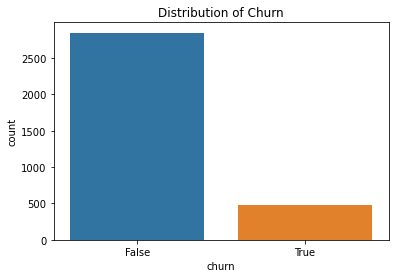

In [75]:
# Plot the distribution of churn
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn');

### Churn by Categorical Features
- Let's see how churn varies with categorical features like 'international plan' and 'voice mail plan'.

international plan    0
voice mail plan       0
dtype: int64


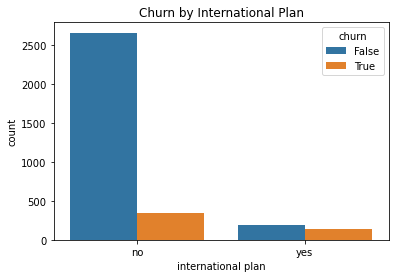

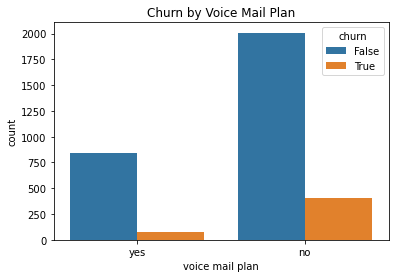

In [76]:
# Churn distribution by categorical features
# Check for missing values in categorical columns
categorical_features = ['international plan', 'voice mail plan']
print(df[categorical_features].isnull().sum())

# Churn by international plan
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn by International Plan')
plt.show()

# Churn by voice mail plan
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('Churn by Voice Mail Plan')
plt.show()


#### Feature Engineering

In [77]:
# Create a new feature 'total minutes' by summing day, evening, and night minutes
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

# Create a new feature 'total calls' by summing day, evening, and night calls
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

# Create a new feature 'total charges' by summing day, evening, and night charges
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

# Display the first few rows to verify the new feature
df[['total day charge', 'total eve charge', 'total night charge', 'total charges']].head()

,total day charge,total eve charge,total night charge,total charges
0,45.07,16.78,11.01,72.86
1,27.47,16.62,11.45,55.54
2,41.38,10.30,7.32,59.00
3,50.90,5.26,8.86,65.02
4,28.34,12.61,8.41,49.36


In [78]:
# Save the cleaned dataset
df.to_csv('cleaned_telecom_data.csv', index=False)

### Preparing the Data for Modeling
Separate Features and Target Variable
- We need to separate the features (independent variables) from the target variable (churn).

In [79]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['churn'])
y = df['churn'] 

Encode Categorical Variables

In [80]:
# Identifying categorical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
print("Categorical columns:", categorical_cols)

# Encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataset
X.head()

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


In [81]:
# Feature Importance Analysis
# Train a simple Random Forest model
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X, y)

# Get feature importance
feature_importances = pd.Series(rf_temp.feature_importances_, index=X.columns)
important_features = feature_importances[feature_importances > 0.01]  # Keeping features above 1% importance

# Keep only important features
X_selected = X[important_features.index]

print("Selected Features:", X_selected.columns)


Selected Features: Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'total minutes', 'total calls', 'total charges',
       'international plan_yes', 'voice mail plan_yes'],
      dtype='object')


In [82]:
# Update X to only use selected features
X = X_selected

Split the Data into Training and Testing Sets

In [83]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2666, 20) (2666,)
Testing set shape: (667, 20) (667,)


#### Build a Predictive Model

In [84]:
# Initialize the model
model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

#### Make Predictions

In [85]:
# Make predictions
y_pred = model.predict(X_test)

# Display first 10 predictions
print("Predicted churn values:", y_pred[:10])

Predicted churn values: [False False False False False False False False False False]


#### Evaluating the Model
##### Confusion Matrix

Confusion Matrix:
 [[554  12]
 [ 85  16]]


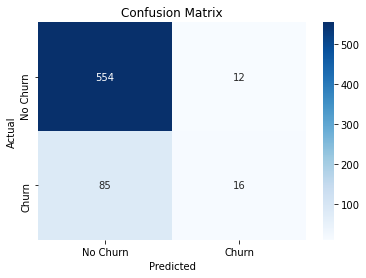

In [86]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report

In [87]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Set custom threshold for better recall
best_threshold = 0.4  # Adjust based on ROC curve analysis
y_pred_adjusted = (y_probs > best_threshold).astype(int)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_adjusted)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.92       566
        True       0.61      0.27      0.37       101

    accuracy                           0.86       667
   macro avg       0.75      0.62      0.65       667
weighted avg       0.84      0.86      0.84       667



#### Observations on Model Performance:
- Accuracy: 86% (Good overall, but accuracy isn’t the best metric here.)
- Precision for Churn (True): 0.61 (Not great; too many false positives.)
- Recall for Churn (True): 0.27 (Very low, meaning the model is missing actual churn cases.)
- F1-score for Churn: 0.37 (Low, indicating poor balance between precision and recall.)
> The model struggles to detect actual churn cases (high false negatives). This is why recall is very low.

#### ROC Curve and AUC

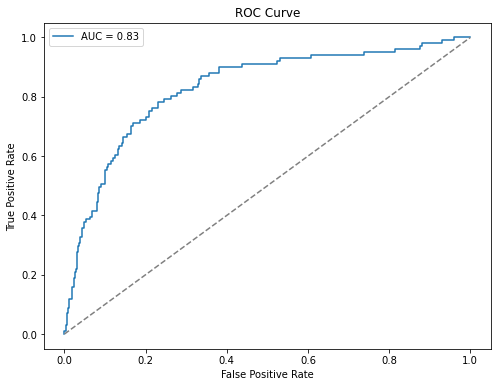

In [88]:
# Compute predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The ROC curve and AUC (Area Under the Curve) evaluate the model's ability to distinguish between classes:

- AUC Score: 0.83

- ROC Curve: The curve is above the diagonal line, indicating that the model performs better than random guessing.

#### Apply SMOTE

In [89]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())

Class distribution after SMOTE:
 False    2284
True     2284
Name: churn, dtype: int64


#### Retrain the Model with Resampled Data

In [90]:
# Initialize the model with regularization tuning
model = LogisticRegression(random_state=42, max_iter=5000, C=0.1)  # Adjust C for better generalization

# Train the model on resampled data
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.1, max_iter=5000, random_state=42)

In [91]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [92]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[534  32]
 [ 60  41]]


In [93]:
# Predict probabilities and apply the threshold
y_probs = model.predict_proba(X_test)[:, 1]
best_threshold = 0.4  # You can adjust this based on ROC curve
y_pred_adjusted = (y_probs > best_threshold).astype(int)

In [94]:
# Generate and print the classification report
class_report = classification_report(y_test, y_pred_adjusted)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.88      0.90       566
        True       0.46      0.58      0.52       101

    accuracy                           0.83       667
   macro avg       0.69      0.73      0.71       667
weighted avg       0.85      0.83      0.84       667



#### Observations on the Improved Model:
- Recall for Churn (True): 0.58 (Increased from 0.27)
- Precision for Churn (True): 0.46 (Dropped slightly from 0.61, but that’s expected.)
- F1-score for Churn: 0.52 (Significant improvement from 0.37)
- Overall Accuracy: 83% (Still solid, but accuracy isn’t our main focus.)

#### Tune the Threshold Further

In [95]:
# Get precision-recall tradeoff values
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Find the threshold where precision and recall are balanced
best_index = (precisions - recalls).argmin()
optimal_threshold = thresholds[best_index]

print("Optimal Threshold:", optimal_threshold)

# Apply new threshold
y_pred_optimized = (y_probs > optimal_threshold).astype(int)

# Print new classification report
print("Classification Report with Optimized Threshold:\n", classification_report(y_test, y_pred_optimized))


Optimal Threshold: 0.007746160018885038
Classification Report with Optimized Threshold:
               precision    recall  f1-score   support

       False       1.00      0.00      0.00       566
        True       0.15      1.00      0.26       101

    accuracy                           0.15       667
   macro avg       0.58      0.50      0.13       667
weighted avg       0.87      0.15      0.04       667



In [96]:
# Try different threshold values
thresholds = [0.2, 0.3, 0.35, 0.4, 0.5]
for t in thresholds:
    y_pred_t = (y_probs > t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred_t))


Threshold: 0.2
              precision    recall  f1-score   support

       False       0.97      0.56      0.71       566
        True       0.27      0.91      0.42       101

    accuracy                           0.61       667
   macro avg       0.62      0.74      0.56       667
weighted avg       0.87      0.61      0.67       667


Threshold: 0.3
              precision    recall  f1-score   support

       False       0.95      0.75      0.84       566
        True       0.35      0.76      0.48       101

    accuracy                           0.75       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.75      0.78       667


Threshold: 0.35
              precision    recall  f1-score   support

       False       0.94      0.82      0.88       566
        True       0.42      0.71      0.53       101

    accuracy                           0.81       667
   macro avg       0.68      0.77      0.70       667
weighted avg       0.86  

Trying another model

In [97]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# Train on resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Apply the chosen threshold (0.35 for now)
y_pred_rf = (y_probs_rf > 0.35).astype(int)

# Print classification report
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.98      0.94      0.96       566
        True       0.73      0.87      0.80       101

    accuracy                           0.93       667
   macro avg       0.85      0.91      0.88       667
weighted avg       0.94      0.93      0.93       667



Here’s a summary of the Random Forest model’s performance:
- Accuracy: 93% → Overall, the model is highly accurate.
- Precision (Churn = Yes): 73% → When the model predicts churn, it’s correct 73% of the time.
- Recall (Churn = Yes): 87% → The model catches 87% of actual churn cases.
- F1-score (Churn = Yes): 80% → A great balance of precision & recall.

What This Means for SyriaTel:
- High recall ensures fewer customers at risk of churning are missed.
- Good precision ensures we don’t falsely identify too many loyal customers as churners.
- This model can help SyriaTel take proactive retention actions with confidence.


Confusion Matrix:
 [[534  32]
 [ 13  88]]


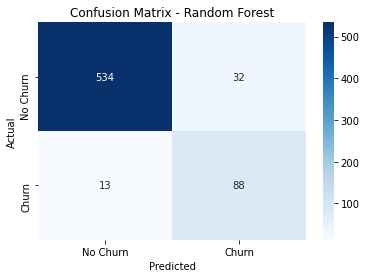

In [98]:
# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix:\n", conf_matrix_rf)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Observations:
- 534 True Negatives (TN): Correctly predicted customers who did not churn.
- 88 True Positives (TP): Correctly predicted customers who churned.
- 32 False Positives (FP): Mistakenly classified 32 loyal customers as churners.
- 13 False Negatives (FN): Missed only 13 actual churners.

This confusion matrix confirms that Random Forest is a strong model, significantly reducing missed churn cases while maintaining good precision. This is a great balance between customer retention efforts and operational efficiency.